<a href="https://www.kaggle.com/code/danielnathan/disaster-tweet-nlp?scriptVersionId=133180719" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# GPT-4 approach

## Overview

The Disaster Tweet NLP project on Kaggle is an excellent opportunity to practice your skills in Natural Language Processing (NLP). Here's a step-by-step guide to get you started, as designed by GPT-4:

## **1. Understand the Problem:**

The first step in any data science project is to understand the problem at hand. In this case, you are provided with a dataset of tweets, and your goal is to predict whether a given tweet is about a real disaster or not.

In a "Disaster Tweet NLP" project, the main objective would typically be to classify whether a given tweet is about a real disaster or not, based on the text of the tweet. This is essentially a binary classification problem, where the two classes are "disaster" and "non-disaster".

Real-time disaster and crisis situation awareness is a critical aspect of emergency services and disaster response. Social media platforms such as Twitter have been recognized as valuable sources of real-time information during these events. Users often post real-time updates about these situations that can be utilized for efficient disaster management. However, due to the volume and speed of social media data, it's important to be able to quickly and accurately classify these posts to determine whether they refer to an actual disaster or are simply metaphorical or figurative uses of language.

For this problem, you would typically be given a dataset of tweets that have already been labeled as disaster or non-disaster. You would use this dataset to train a machine learning model that can accurately predict these labels. The challenge in this task lies in the complexities of human language -- ambiguity, use of sarcasm, metaphors, and the wide variety of ways that people can express the same idea. Additionally, Twitter data presents its own challenges, including the use of hashtags, emojis, and abbreviations, as well as the 280-character limit for tweets.

You should refer to the specific competition page for exact details about the problem, dataset, evaluation metric, and any additional requirements or constraints. The competition organizers may have specific rules about what tools, data, and techniques you can use.

## **2. Data Collection:**

Data is already provided by Kaggle. You can download it directly from the competition page. The data will likely be split into training and test sets.

In [2]:
# Assign the provided test and training data to variables
test_data = pd.read_csv(
    '/kaggle/input/nlp-getting-started/test.csv'
)
training_data = pd.read_csv(
    '/kaggle/input/nlp-getting-started/train.csv'
)

In [3]:
# Dataframe comparisons
test_data_size = test_data.shape[0]
training_data_size = training_data.shape[0]
total_data_size = test_data_size + training_data_size

print(f"Total dataframe size: {total_data_size}")
print(f"Test data rows: {test_data_size} "
      f"(~{(test_data_size / total_data_size):.2f})\n"
      f"Training data rows: {training_data_size} "
      f"(~{(training_data_size / total_data_size):.2f})")


Total dataframe size: 10876
Test data rows: 3263 (~0.30)
Training data rows: 7613 (~0.70)


## **3. Data Exploration and Preprocessing:**

Before training any model, take a closer look at your data. Use Python libraries like Pandas and Matplotlib to explore the data. Look at some examples of disaster and non-disaster tweets to understand their differences.

### **3.1. Data Exploration:**

Data exploration, or Exploratory Data Analysis (EDA), is the process of understanding the dataset, its structure, and the patterns and relationships that are inherent in the dataset. For the Disaster Tweet NLP project, your data is mostly text, so the EDA process could include:

- Checking the distribution of disaster and non-disaster tweets: You can use a simple bar plot to visualize the number of disaster versus non-disaster tweets. This can help you understand if the classes are balanced or not, which might affect how you approach modeling.
- Examining the length of tweets: Plot the distribution of tweet lengths to see if there's a difference between disaster and non-disaster tweets. This could potentially be a useful feature.
- Analyzing the most frequent words: Use a word cloud or bar plot to visualize the most frequent words in the dataset, again checking if there are differences between the classes.

#### **3.1.1: Checking the distribution of disaster and non-disaster tweets**

Use a simple bar plot to visualize the number of disaster versus non-disaster tweets. This can help you understand if the classes are balanced or not, which might affect how you approach modeling.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

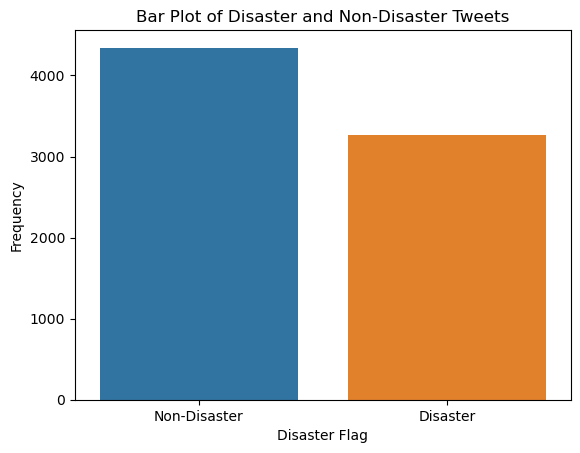

In [5]:
sns.countplot(x='target', data=training_data)
plt.xlabel('Disaster Flag')
plt.ylabel('Frequency')
plt.title('Bar Plot of Disaster and Non-Disaster Tweets')
plt.xticks([0,1], ['Non-Disaster', 'Disaster'])
plt.show()

#### **3.1.2: Examining the length of the tweets**
Plot the distribution of tweet lengths to see if there's a difference between disaster and non-disaster tweets. This could potentially be a useful feature.

#### **3.1.3: Analyzing the most frequent words** 
Use a word cloud or bar plot to visualize the most frequent words in the dataset, again checking if there are differences between the classes.

### **3.2. Data Preprocessing:**

Data preprocessing is crucial in NLP projects. It's about cleaning and transforming raw text into a format that is suitable for your machine learning model. Here are some steps you can consider:

- Lowercasing: Standardizing the text by converting all letters to lowercase.
- Tokenization: Breaking down the text into individual words.
- Stopword removal: Removing common words that don't carry much meaning (like 'is', 'the', 'and').
- Lemmatization/Stemming: Reducing words to their base or root form (e.g., 'running' to 'run').
- Removing punctuation and special characters: This can help in standardizing the text and reducing noise.
- Handling URLs, numbers, and emoticons: Decide how to handle these, as they may or may not contribute to understanding the disaster context.

Remember, the goal of preprocessing is to clean and simplify the text data without losing important information. The steps you choose to include will depend on your specific task and what you find during the exploration stage.

#### **3.2.1: Lowercasing:** 
Converting all the text to lowercase ensures that the same word in different cases will be treated as the same word.

In [6]:
training_data_lower = training_data.copy()
training_data_lower['text'] = training_data_lower['text'].str.lower()

In [7]:
print(training_data_lower['text'][100])

.@norwaymfa #bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gfjfgtodad


#### **3.2.2: Handling URLs and @ mentions tags:**
Since you're dealing with tweets, they might contain URLs and @ mentions. You have to decide how to handle these. In many cases, they are removed.

In [8]:
import re

def remove_urls(text: str) -> str:
    """
    Removes URLs from the string using regex
    """
    return re.sub(r'http\S+|www.\S+', '', text)

In [9]:
training_data_no_urls = training_data_lower.copy()
training_data_no_urls['text'] = training_data_no_urls['text'].apply(remove_urls)

In [10]:
print(training_data_no_urls['text'][100])

.@norwaymfa #bahrain police had previously died in a road accident they were not killed by explosion 


In [11]:
def remove_mentions(text: str) -> str:
    """
    Removes mentions, i.e., @username from the string
    """
    return re.sub(r'@\S+', '', text)

In [12]:
training_data_no_mentions = training_data_no_urls.copy()
training_data_no_mentions['text'] = training_data_no_mentions['text'].apply(remove_mentions)

In [13]:
print(training_data_no_mentions['text'][100])

. #bahrain police had previously died in a road accident they were not killed by explosion 


#### **3.2.3: Removing Punctuation and Special Characters:** 
Punctuation and special characters can provide little to no value when analyzing text and can be removed.

In [14]:
def remove_non_alphanum(text: str) -> str:
    """
    Removes special characters and punctuations from the string
    """
    return re.sub(r'\W+', ' ', text)

In [15]:
training_data_non_alphanumeric = training_data_no_mentions.copy()
training_data_non_alphanumeric['text'] = training_data_non_alphanumeric['text'].apply(remove_non_alphanum)

In [16]:
print(training_data_non_alphanumeric['text'][100])

 bahrain police had previously died in a road accident they were not killed by explosion 


#### **3.2.3: Tokenization:** 
This is the process of breaking down the text into individual words. Each word in the text is considered a 'token'. The choice of tokenization library or approach depends on your specific requirements, the task at hand, and the context in which you are working. Here's a brief overview of some popular tokenization options, namely NLTK, Hugging Face Transformers, and GPT (OpenAI's Generative Pre-trained Transformer):

1. NLTK (Natural Language Toolkit):
NLTK is a widely used library for natural language processing in Python. It provides a range of tokenization methods, including word tokenization, sentence tokenization, and more. NLTK is well-established and offers flexibility, making it suitable for basic tokenization needs or when you require fine-grained control over the tokenization process.

2. Hugging Face Transformers:
Hugging Face Transformers is a powerful library for working with state-of-the-art transformer models in NLP, such as BERT, GPT, and many others. It provides a unified interface and tokenization utilities for various pre-trained models. Hugging Face Transformers' tokenizers are specifically designed to handle subword tokenization, special tokens, padding, and other requirements of transformer-based models. They offer efficient and optimized tokenization for large-scale language models.

3. GPT (Generative Pre-trained Transformer):
GPT, developed by OpenAI, refers specifically to the transformer-based language models such as GPT-2 and GPT-3. GPT models have their own tokenization schemes that split the input into meaningful subword units, which enables capturing the contextual relationships between words. OpenAI provides the `gpt-2-simple` library, which includes tokenization functionality for GPT-2 models.

Apart from NLTK, Hugging Face Transformers, and GPT-based tokenization, there are other popular tokenization libraries and approaches used in natural language processing. Here are a few additional options that you might find useful:

1. Spacy: Spacy is a popular Python library for NLP that provides a built-in tokenizer along with various other NLP functionalities. Spacy's tokenizer is known for its speed and efficiency and can handle tokenization, sentence segmentation, part-of-speech tagging, and more.

2. Stanford CoreNLP: Stanford CoreNLP is a suite of natural language processing tools developed by Stanford University. It offers a tokenizer that supports tokenization, sentence splitting, and other linguistic annotations. CoreNLP is known for its accuracy and ability to handle complex tokenization scenarios.

3. SentencePiece: SentencePiece is an unsupervised text tokenizer and detokenizer primarily designed for subword tokenization. It supports several tokenization algorithms, including Byte-Pair Encoding (BPE) and Unigram Language Model. SentencePiece is often used in machine translation, language modeling, and other tasks that benefit from subword tokenization.

4. spaCy-transformers: spaCy-transformers is an extension library for spaCy that integrates transformer-based models and tokenizers. It allows seamless integration of transformer-based models with spaCy's processing pipelines, including tokenization. This can be useful when working with both traditional NLP tasks and transformer models within the same pipeline.

To decide which option to use, consider the following factors:
- Task requirements: Different tokenization libraries may have specific features tailored to different tasks, so choose one that aligns with your specific needs.
- Pre-trained models: If you're working with a specific pre-trained model, it's recommended to use the tokenizer associated with that model to ensure compatibility and consistency.
- Community support: Consider the availability of resources, documentation, and community support for the chosen tokenization library.

In many cases, using Hugging Face Transformers with its comprehensive tokenizers is a popular choice due to its wide range of pre-trained models and strong community support. However, it's worth exploring the documentation and examples of each option to understand their features, capabilities, and compatibility with your project requirements.

In [17]:
import transformers
from transformers import AutoTokenizer

In [18]:
def tokenize_words(text:str, model_name: str ="bert-base-uncased") -> list:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens = tokenizer.tokenize(text)
    return tokens

In [19]:
text = "Hello, world! This is an example sentence."

tokens = tokenize_words(text)
print(tokens)

['hello', ',', 'world', '!', 'this', 'is', 'an', 'example', 'sentence', '.']


#### **3.2.4: Removing Stop Words:** 
Stop words are common words that typically do not carry much meaning and are often removed from text. Examples include 'is', 'and', 'the', etc. Python's NLTK library has a built-in list of stop words that you can use.

#### **3.2.5: Lemmatization/Stemming:** 
These are techniques to reduce words to their root form. For example, the stem of 'running' would be 'run'. This can help to reduce the dimensionality of the data and group together similar words.

#### **3.2.6: Handling Numbers:**
Sometimes numbers are left as they are, other times they're removed, and sometimes they're replaced with a placeholder (like 'num').

#### 3.2.7: Additional items
- **Handling Emojis:** Again, because this data comes from Twitter, there might be emojis in the text. Depending on your analysis, you might want to remove, keep or encode them in some way.



## **4. Feature Extraction:**

Once your data is cleaned, you'll need to convert it into a form that your model can understand. This often means extracting features from the text. 

Some techniques for this are:

- Bag of Words: Create a matrix of occurrence of words within the text.
- TF-IDF: Weight the words according to how often they appear in a document compared to the corpus.
- Word Embeddings: Use pre-trained models like Word2Vec or GloVe to convert words into dense vectors that capture semantic meaning.
- Sequence Models: If you want to maintain the order of words, consider turning your text into sequences and using models that can handle them (like RNNs, LSTMs or Transformers).

Certainly! Let's delve deeper into Feature Extraction, a crucial step in NLP tasks.

Feature extraction is about converting raw data into a set of inputs that a machine learning model can understand and use. For text data, this usually means converting text into numerical vectors. There are several common techniques for this:

**1. Count Vectorization (Bag of Words):** 

This approach treats each document as a bag of its words, disregarding grammar and word order but keeping the multiplicity of the words. The vocabulary is built from all the unique words in the text corpus. Each document or text in the corpus is then represented as a vector where each element is the count of the number of times a particular word appears in the document.

**2. TF-IDF Vectorization:**

TF-IDF stands for Term Frequency-Inverse Document Frequency. It's similar to Count Vectorization, but in addition to counting the occurrences of words, it assigns each word in a document a weight. This weight is higher for words that appear frequently in a specific document but rarely in the rest of the corpus, and lower for words that are common in the entire corpus. This can help highlight words that are more unique to a particular document.

**3. Word Embeddings (Word2Vec, GloVe):**

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. They are capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. Word2Vec and GloVe are two popular models to create word embeddings of a text. These models use neural networks and take into account the context of words, producing dense vector representations as opposed to sparse ones obtained from BoW or TF-IDF.

**4. Sequence Vectors (Padding, Truncating):**

Sequence vectors are especially useful in deep learning models when the order of the words matter, like in RNNs or Transformers. Text is converted to sequences of word indices, then these sequences are padded (or truncated) to be of the same length so they can be input into these models. 

**5. One-Hot Encoding:**

This is a basic technique where each word in the vocabulary is represented as a vector that is 0 in all dimensions except one, which is 1. The dimension that is 1 corresponds to the position of the word in the vocabulary.

These are not the only techniques for feature extraction in NLP, but they are among the most common. It's also worth mentioning that not every technique will work well for every problem. The choice of feature extraction technique can be influenced by the problem you're solving, the model you're using, and the nature of your data.

In practice, you might need to experiment with different feature extraction methods to find the one that works best for your specific problem.

## **5. Model Training:**

Now that your data is preprocessed and you have your features, you can start training your model. Given the nature of the task (binary classification), you can start with simple models such as logistic regression, naive Bayes, or move to more complex models like SVM, Random Forest, Gradient Boosting or even Neural Networks.

Absolutely! Let's dive into step #5, which is Model Training.

Once you've converted your text data into numerical features, you can feed them into a machine learning model. The choice of model will often depend on your problem, the nature of your data, and the results of your feature extraction. Here are some models commonly used in NLP tasks:

**1. Logistic Regression:**

Logistic Regression is a simple and efficient linear model used for binary classification problems. Despite its simplicity, it can work quite well on text data when the dataset is linearly separable. 

**2. Naive Bayes:**

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features. They are particularly good for text classification tasks and work well even with small datasets.

**3. Support Vector Machines (SVM):**

SVMs are a powerful set of algorithms for performing binary and multiclass classification. They can be particularly useful when dealing with high-dimensional data.

**4. Decision Trees and Random Forests:**

Decision Trees are simple yet powerful algorithms for classification and regression tasks. Random Forests combine multiple Decision Trees to create a more robust model.

**5. Gradient Boosting Machines (XGBoost, LightGBM):**

Gradient Boosting Machines like XGBoost and LightGBM have proven to be very effective on a wide range of machine learning problems. They work by building many weak learners (small decision trees), and then combine them in a way that makes them become a single strong predictor.

**6. Neural Networks (RNN, LSTM, GRU, Transformer, BERT):**

Deep learning models have revolutionized the field of NLP. Recurrent Neural Networks (RNNs) and their variations like Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) are useful for sequential data as they take into account the order of the data. Transformer models (such as BERT and its variants) have recently achieved state-of-the-art results in many NLP tasks.

The training process usually involves defining a loss function that measures the difference between the model's predictions and the actual values, and an optimization algorithm that will adjust the model parameters to minimize the loss function.

It's also good practice to set aside a portion of your training data as a validation set. You can use this set to check how well your model is learning and to prevent overfitting. Overfitting happens when your model learns the training data too well and isn't able to generalize to new, unseen data.

Once the model is trained, you can use it to make predictions on new, unseen data. The parameters learned by the model during the training phase are used to predict the target variable of new data. 

It's worth noting that it's usually a good idea to experiment with several different models to see which one performs best on your specific task. The choice of model can have a significant impact on the performance of your NLP task.

## **6. Model Evaluation:**

Evaluate your model's performance on the validation set. Depending on the competition rules, they might have a specific evaluation metric you should use.

Yes, absolutely. Model evaluation is a critical step in the machine learning pipeline as it allows us to assess the quality of our model. Here are some key aspects of model evaluation you should consider:

**1. Split the dataset:**

Before you even start training your model, you should split your dataset into at least two subsets: a training set and a validation set. Some people also like to create a third subset, called a test set. The model is trained on the training set, tuned with the validation set, and finally, the performance is assessed using the test set.

**2. Choose the right metrics:**

Choosing the right metrics to evaluate your model is critical. The choice of metric depends on the problem at hand, the business context, and the data. For binary classification problems, here are some commonly used metrics:

- **Accuracy:** This is simply the proportion of predictions that the model got right. However, accuracy can be misleading if the classes are imbalanced.

- **Precision:** Precision is the proportion of true positive predictions (i.e., the model predicted a disaster and it was indeed a disaster) among all positive predictions. 

- **Recall (or Sensitivity):** Recall is the proportion of true positive predictions among all actual positives.

- **F1 Score:** The F1 score is the harmonic mean of precision and recall. It's a good metric to use if you want to balance precision and recall.

- **AUC-ROC:** The Area Under the Receiver Operating Characteristic curve is a performance measurement for classification problems at various thresholds settings. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting disasters as disasters and non-disasters as non-disasters.

Remember, no single metric can provide a complete picture of the model's performance, so it's often helpful to consider multiple metrics.

**3. Cross-validation:**

Cross-validation is a resampling technique with a basic idea of dividing the training dataset into ‘k’ folds. For each unique fold, we first train our model on the remaining k-1 portions of the data, and then validate our model on this fold. This process is repeated until each fold of the k folds have served as the test set. The average cross-validation score is used to check the effectiveness of the model. This helps in making the model more generalized.

**4. Confusion Matrix:**

A confusion matrix is a tabular way of visualizing the performance of your model. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

**5. Overfitting & Underfitting:**

Be aware of overfitting and underfitting. Overfitting happens when your model performs well on the training data but poorly on the validation/test data. It's a sign that your model is too complex: it's fitting the noise in the data. Underfitting is the opposite: your model is too simple to learn the underlying structure of the data. Both overfitting and underfitting lead to poor generalization to unseen data.

Remember, the goal of model evaluation isn't just to get a model that performs well on the training data, but to get a model that generalizes well to new, unseen data.

## **7. Hyperparameter Tuning & Model Improvement:**

Depending on your model's performance, you might want to tune your model's hyperparameters or try different models. You could also consider using ensemble methods to improve your model's performance.

Sure, I'd be happy to. Let's discuss step #7, Model Optimization.

**Model Optimization** is all about improving the performance of your machine learning model. After training a model and evaluating its performance, you might find that it doesn't perform as well as you hoped. There are several ways to try and improve your model's performance. Here are some common strategies:

**1. Hyperparameter Tuning:**

Most machine learning models have hyperparameters that control how they learn from the data. For example, a decision tree has a hyperparameter that controls the maximum depth of the tree. Hyperparameter tuning involves trying out different values of these hyperparameters to see which values give the best performance. There are several techniques for this, including grid search, random search, and Bayesian optimization. 

**2. Feature Engineering:**

Sometimes, you can improve a model by creating new features from your existing data. This could involve combining features, transforming features, or creating entirely new features. The idea is to provide new information or perspectives that help your model make better predictions.

**3. Ensembling:**

Ensembling involves combining multiple models to make predictions. This can often result in better performance than any individual model. There are several techniques for ensembling, including bagging (like Random Forests), boosting (like XGBoost and AdaBoost), and stacking.

**4. Regularization:**

Regularization is a technique to prevent overfitting by adding a penalty term to the loss function. The penalty term will restrict the complexity of the model, making it harder for the model to overfit the training data. L1 and L2 are the most common types of regularization.

**5. Experiment with Different Models:**

If one model isn't working well, try a different one! Different models have different strengths and weaknesses, and it's possible that a different model will perform better on your dataset. 

Remember, model optimization can be a time-consuming process, and it's often more of an art than a science. It might take several rounds of optimization to get a model that performs well. Also, be careful to avoid overfitting during this process. Always use a separate validation set or cross-validation to evaluate your model's performance, and prioritize a model's ability to generalize to unseen data over its performance on the training data.

## **8. Predictions & Submission:**

Once you're happy with your model, you can make predictions on the test set and submit your results to Kaggle.

Remember, participating in Kaggle competitions is not just about getting the highest score. It's also about learning new skills, understanding the problem, experimenting with different techniques, and learning from others in the Kaggle community.

Absolutely! Step #8 is deploying the model. Let's delve deeper into that.

Once you've built a model that you're happy with, the next step is to deploy that model so that it can be used to make predictions on new, unseen data. This process will vary a lot depending on the specifics of your project, but here are some general steps that you might follow:

**1. Final Model Training:**

First, you'll often want to retrain your model on all of your available data. During the model development process, you might have held out a portion of your data for validation or testing. But now that you're done with model development, you can afford to use all of your data for training in order to make the model as accurate as possible.

**2. Model Serialization:**

Next, you'll need to serialize your model. Serialization is the process of turning your trained model, which is an in-memory data structure, into a format that can be written to disk. There are several ways to do this, depending on your specific model and programming language. In Python, for example, you might use a library like `pickle` or `joblib` to serialize your model.

**3. Deployment:**

The specifics of this step will depend on how your model is going to be used. Here are a few common deployment scenarios:

- **Local Application:** If your model is going to be used in a local application, then you might just need to write a script that loads the serialized model and uses it to make predictions.

- **Web Service:** If your model needs to be accessible over the web, then you could wrap it in a web service. The web service would have an endpoint that takes in data, uses the model to make a prediction on that data, and then returns the prediction. This could be done using a Python web framework like Flask or Django.

- **Cloud Deployment:** You might also choose to deploy your model to the cloud. Many cloud providers offer machine learning platforms that can handle a lot of the deployment details for you. These platforms can make it easy to scale your application, monitor its performance, and update it with new versions of your model.

**4. Monitoring and Maintenance:**

After your model is deployed, it's important to monitor its performance and maintain it. This could involve retraining the model periodically with new data, or it could involve updating the model if you find that its performance is degrading. It's also important to monitor the system that your model is running on to ensure that it's operating correctly and efficiently.

Remember, deploying a machine learning model is a complex process with many details that can vary depending on the specifics of your project. These are just general guidelines, and you'll need to adapt them to your particular situation.